<a href="https://colab.research.google.com/github/hhbb123/hoon/blob/master/condensed%20matter/f_0_BoseHubbardmodel_phasediagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pylab as plt
import math


In [107]:
def Hamiltonian(t,u,q):         #q=<b>
  Hmf=np.zeros((6,6))
  for i in range(0,6):
      Hmf[i][i]=0.5*i*(i-1)-u*i
  for i in range(0,5):
      Hmf[i][i+1]=-t*math.sqrt(i+1)*q*4
      Hmf[i+1][i]=-t*math.sqrt(i+1)*q*4
  for i in range(1,5):
      Hmf[i][i-1]=-t*math.sqrt(i)*q*4
      Hmf[i-1][i]=-t*math.sqrt(i)*q*4

  return Hmf

In [108]:
T=[]
U=[]
Q=[]
t_min=0
t_max=0.1
u_min=0
u_max=1.5

for t in np.arange(0,t_max,t_max/500):
  Q_prev=[]
  for u in np.arange(u_min,u_max,u_max/500):
    U.append(u)
    q=1
    q_prev=100000000
    while abs(q_prev-q)>1e-4:
      D,V=np.linalg.eig(Hamiltonian(t,u,q))
      w=V[:,np.argmin(D)]
      q_prev=q
      q=0
      for i in range(0,5):
        q += ((i+1)**0.5)*np.conjugate(w[i])*w[i+1]
    Q_prev.append(q)
  Q.append(Q_prev)
  T.append(t)


In [109]:
print(Q[5][2])
Tc=[]
Uc=[]
for k in range(0,499):
  for r in range(len(Q[k])-1):
    if abs(Q[k][r])<1e-3:
      Tc.append(T[k])
      Uc.append(U[r%499])


0.00018542114432015916


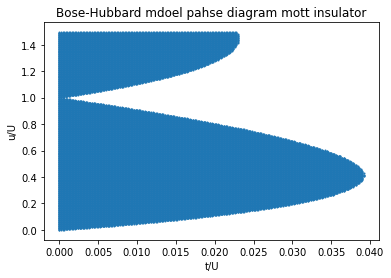

In [111]:
plt.scatter(Tc,Uc,s=1)
plt.xlabel('t/U')
plt.ylabel('u/U')
plt.title('Bose-Hubbard mdoel pahse diagram mott insulator')
plt.show()